## Analysis of Palmer Penguins Data Set

In [2]:
# Importing pandas to allow data manipulation and analysis
# Importing numpy to allow for operations on arrays 
import pandas as pd
import numpy as np

##### Loading in the data set

In [3]:
#Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

##### Overview of the data set, including all variable names (in columns) and a selection of values (in rows)

In [4]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


This dataset contains 7 variables. To model the data the following Python variable types should be used:

"species", "island" and "sex" can be considered string variables as they contain strings of text
"bill_length_mm", "bill_depth_mm" can be considered float variables as they contain numeric values with floating decimal points
"flipper_length_mm", and "body_mass_g" can be considered integer variables, as they contain whole numbers with no floating points. However, to perform meaningful analysis, they must be considered float variables as the mean and standard deviation will contain floating decimal points

##### An overview of descriptive statistics for each scale (continuous) variable. This includes the count of values for each variable, the mean, standard deviation, minimum and maximum values, and the first, second, and third quartiles

In [5]:
#Describe the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##### An overview of categorical variables, and associated values and counts

In [6]:
#Count penguins of each sex
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [7]:
#Count penguins of each species
species_counts = df["species"].value_counts()
species_counts

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
#Count penguins on each island
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

##### Bar chart for species count

In [10]:
import matplotlib.pyplot as plt 

In [11]:
un_species = df['species'].unique()
un_species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<BarContainer object of 3 artists>

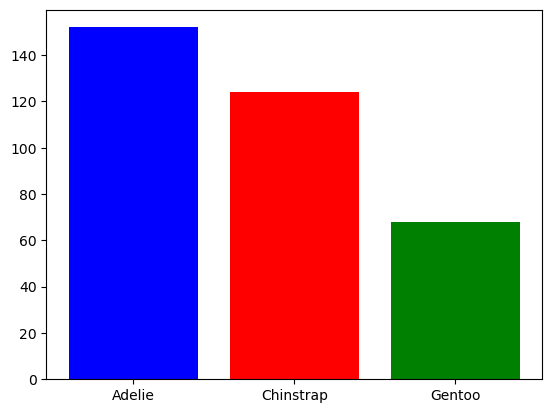

In [12]:
plt.bar(un_species, species_counts, color = ["blue", "red", "green"])

##### Histogram of body mass

In [13]:
#Convert pandas data frame columnn to numpy array
body_mass = df["body_mass_g"].to_numpy()

(array([15., 43., 71., 53., 42., 41., 28., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <BarContainer object of 10 artists>)

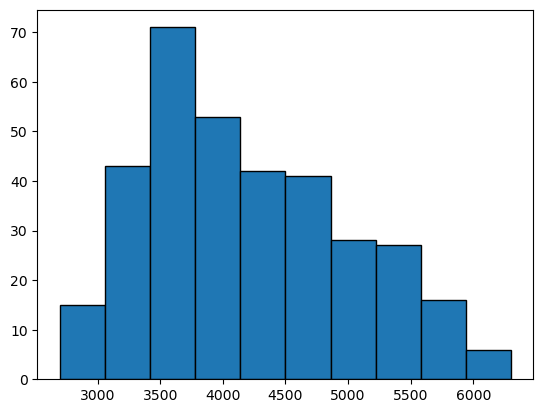

In [14]:
plt.hist(body_mass, edgecolor = "black")

#### Correlation anlaysis of bill length and flipper length

In [15]:
bill_length = df["bill_length_mm"].to_numpy()
bill_length = bill_length[~np.isnan(bill_length)] #remove NANs- https://stackoverflow.com/questions/11620914/how-do-i-remove-nan-values-from-a-numpy-array

In [16]:
flipper_length = df["flipper_length_mm"].to_numpy()
flipper_length = flipper_length[~np.isnan(flipper_length)]

In [17]:
r = np.corrcoef(bill_length, flipper_length)
r

array([[1.        , 0.65618134],
       [0.65618134, 1.        ]])

In [31]:
#While correlation coefficient can be found with numpy, pearsonr is needed to determine statistical significance
#https://www.statology.org/p-value-correlation-pandas/
from scipy.stats import pearsonr
df_new = df.dropna()
pearsonr(df_new["bill_length_mm"], df_new["flipper_length_mm"])

PearsonRResult(statistic=0.6530956386670859, pvalue=7.211340708097371e-42)

##### As p-value is below .001, there is less than 1 in 1000 chance that the correlation occured by chance

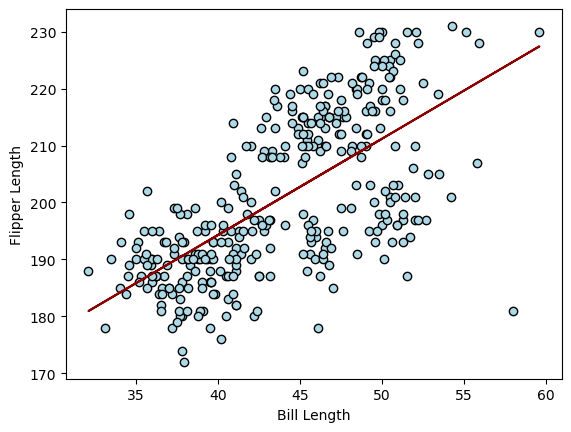

In [28]:
#Scatter plot to visualise relationship between bill length and flipper length

plt.scatter(bill_length, flipper_length, c = "lightblue", edgecolors = "black")
plt.xlabel("Bill Length")
plt.ylabel("Flipper Length")

#Add regression line- https://www.statology.org/scatterplot-with-regression-line-python/
#obtain m (slope) and b(intercept) of linear regression line

m, b = np.polyfit(bill_length, flipper_length, 1)
plt.plot(bill_length, m*bill_length+b, c = "darkred")
plt.show()

***
### End 